In [1]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Week_8_Q&A_dataset - Sheet1.csv")

# 1. Carry out descriptive analytics on the dataset.


In [3]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [4]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [5]:
df.shape

(28, 3)

In [6]:
df.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

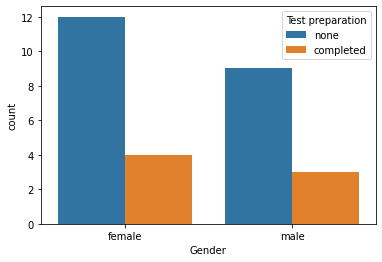

In [7]:
ax=sns.countplot(x = 'Gender',
              data = df,
              order = df['Gender'].value_counts().index, hue='Test preparation')
plt.show()

# 2. Check whether female and male students scored the same marks.

In [8]:
#H0 -> male and female students have scored almost same marks
#H1 -> male and female students have scored different marks

In [9]:
df['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [27]:
x=np.array(df[df['Gender']=='male']['Total Marks'])
y=np.array(df[df['Gender']=='female']['Total Marks'])
ttest,pval= ttest_ind(x,y,alternative='two-sided')
print(pval)
if(pval>0.05):
    print("we accept the null hypothesis that the male and female students scored almost same marks")
else:
    print("we reject the null hypothesis and prove that their scores differs much")
print(x.mean())
print(y.mean())

0.4937822317960763
we accept the null hypothesis that the male and female students scored almost same marks
30.416666666666668
33.75


In [18]:
#from the means also can be seen that, the students scored almost same marks

# 3.Whether test preparation helps the students Hypothesis

In [22]:
stu_data=df.groupby('Test preparation')['Total Marks'].mean()
stu_data


Test preparation
completed    44.571429
none         28.238095
Name: Total Marks, dtype: float64

In [ ]:
# from the data it is found that the the preparation helped students

In [28]:
#H0 : Mean of students who completed the test preparation <= that of who did not complete 
#H1 : Mean of students who completed the test preparation >  that of students who did not complete 

In [29]:
x=np.array(df[df['Test preparation']=='none']['Total Marks'])
y=np.array(df[df['Test preparation']=='completed']['Total Marks'])
ttest,pval= ttest_ind(x,y,alternative='two-sided')
print(pval)
if(pval>0.05):
    print("we accept the null hypothesis that the mean of the total score of students who completed test preparation is same as that of the students who didnt complete test preparation")
else:
    print("we reject the null hypothesis ie, accept alternate hypothesis, mean of prepared students scores is different from that of students who didnt complete the preparation")

0.0012671292457320106
we reject the null hypothesis ie, accept alternate hypothesis, mean of prepared students scores is different from that of students who didnt complete the preparation
